# Understanding Backpropagation equations with an example

Backpropagation is probably the most complicated introductory topic when it comes to machine learning. We have to deal with some tedious math and it's easy to loose track of things. We'll approach backpropagation starting with the derivation of the equations of forward propagation and backpropagation, then we put them in program to verify that everything works. We'll see that with a little patience the basic idea is actually not too complicated. 

We do not put emphasis on the code itself, we keep it simple and without advanced programming patterns, we focus instead on the concepts that make neural networks work.

To reach that goal we choose a fully connected, 3-layer, neural network (see figure below).

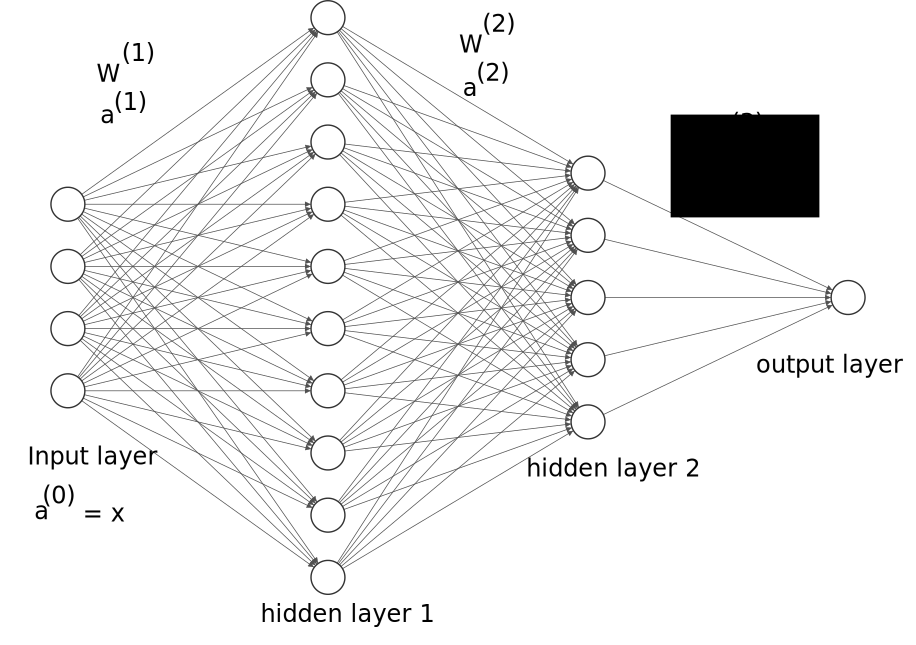

In [1]:
from IPython.display import SVG

SVG('nn3.svg')

Let us define the notation:
- $n^{l}$ is the number of neurons in layer $l$ 
- $W^{(l)}$ is the weights matrix from layer $l-1$ to layer $l$. It has dimensions ($n^{(l)} \times n^{(l-1)}$)
- $b^{(l)}$ (not displayed above) is the vector of biases of layer $l$. It has dimensions $n^{(l)} \times 1$
- $a^{(l)}$ is the vector of activations, that is, the output of the layer $l$. It has dimensions  $n^{(l)} \times 1$
- $z^{(l)}$ is the vector of pre-activations. We have $a^{(l)} = f^{(l)}(z^{(l)})$ where $f^{(l)}$ is the *activation function* of layer $l$.
- we indicate with $x$ the input sample and with $y$ the target variable. $\hat{y}$ is the predicted output.

The weights and the biases are the parameters of the network we need to optimize for in order to minimize the output error. At that point the neural network starts to look like a viable model for the dataset that we are studying. It's not all there is to do to have a "good" model (consider for example overfitting) but it's a necessary and fundamental step.

## The three steps of neural network operation

We can divide the operation of neural networks in 3 main steps:
- Foward Propagation, where the output of the network is calculated starting from the input
- Loss/cost function calculation, where the distance of the calculated output from the "true" target variable is calculated
- Backpropagation and parameters update, *this is the part we focus on in this notebook*

## Forward Propagation

Forward propagation in a fully connected network is straightforward. The output is calculate by a sequence of matrix multiplications. If we indicate the input to the neural network with $x$ (also equal to $a^{(0)})$ we have that the output of layer 1 is $$a^{(1)} = f^{(1)}(z^{(1)})$$
with $$z^{(1)}=w^{(1)} \cdot a^{(0)} + b^{(1)}.$$

For the generic layer l we have:
$$a^{(l)} = f^{(l)}(z^{(l)})$$
$$z^{(l)} = w^{(l)} \cdot a^{(l-1)} + b^{(l)}$$
where the dot "$\cdot$" is the row-column matrix multiplication. In our case we have l=1, 2, 3 so we need to repeat the previous equations 3 times. For an arbitrary number of layers we just need to put those two equations in a loop, and loop over the number of layers.

## Loss/cost function calculation

Initially the weights in the matrices $W^{(l)}$ and the biases in the vectors $b^{(l)}$ are initialized randomly so the network won't give us a good prediction, that is a prediction that is close to the target variable. To quantify that distance (and to minimize it) we need to comput the loss function. For the binary classification problem that we want to solve we use the *binary cross-entropy* loss: $$\mathcal{L} = - (y \log(\hat{y}) + (1 - y) \log(1-\hat{y})).$$
You have probably noticed that we are not averaging over the batch samples. In fact in this simple example we do not use batch training and stochastic gradient descent, but a simple gradient descent. We feed one sample with one sample at a time and update the weights and biases for each sample. A good upgrade left to the reader would be to average the loss over several samples and then perform backpropagation.

## Backpropagation

We now discuss the real reson why we are here, that is, the equations of *backpropagation*. The goal of backpropagation is to minimize the loss function by calculating by how much we need to change the weights and biases of the network. In the amount by which we need to change the parameters of the network is given by the equations of *gradient descent*:
$$w^{(l)} = w^{(l)} - \alpha \frac{\partial \mathcal{L}}{\partial w^{(l)}}$$
$$b^{(l)} = w^{(l)} - \alpha \frac{\partial \mathcal{l}}{\partial b^{(l)}}$$
where $\alpha$ is a scalar number that controls the *learning rate*, that is, the weight of the partial derivatives (or loss/cost).
All we need to do then is to calculate the partial derivatives or the gradient of the loss function.
[**finish this part**]

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
def sigmoid(vec):
    """ Sigmoid activation function

    Args:
        vec: input features vector
    """
    return 1/(1 + np.exp(-vec))


def diff_sigmoid(vec):
    """ derivative of the sigmoid 
    
    Args:
        vec: vector with respect to differentiate for
    """
    return sigmoid(vec) * (1. - sigmoid(vec))

In [3]:
class network(object):
    def __init__(self, n_features, alpha=0.01):
        """ Initalize weights and biases of the neural net
            
            Args:
                n_features: number of features in the input matrix
                alpha: learning rate
        """
        self.alpha = alpha

        self.W1 = np.random.normal(0, .1, (10, n_features))
        self.W2 = np.random.normal(0, .1, (5, 10))
        self.W3 = np.random.normal(0, .1, (1, 5)) 
        
        self.b1 = np.ones((10, 1))
        self.b2 = np.ones((5, 1))
        self.b3 = np.ones((1, 1))

        # "memory" of the network
        # we keep intermediate results needed for the backpropagation

        self.z1 = None
        self.a1 = None
        self.z2 = None
        self.a2 = None
        self.z3 = None
        self.a3 = None        

    @staticmethod
    def cross_entropy_loss(y_hat, y):
        """ calculates the loss function 
        
            Args:
                y_hat: calculated output array
                y:     ground truth array      
        """
        y_hat = np.squeeze(y_hat)
        loss = y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)
        return - loss

    def forward_prop(self, x):
        """ Calculates the output of the neural net

        Args:
            x: input features vector
        """
        self.x = x
        self.z1 = np.dot(self.W1, x) + self.b1
        self.a1 = sigmoid(self.z1)

        self.z2 = np.dot(self.W2, self.a1) + self.b2
        self.a2 = sigmoid(self.z2)

        self.z3 = np.dot(self.W3, self.a2) + self.b3
        self.a3 = sigmoid(self.z3)  # output of the network

        return self.a3
    
    def backprop(self, y_hat, y):
        """ backpropagation 
            
            Args:
                y_hat: array with the prediction (forward propagation)
                y: classes (ground truth)
        """
        self.dCdz3 = y_hat - y
        self.dCdW3 = np.dot(self.dCdz3, self.a2.T)
        self.dCdb3 = self.dCdz3

        self.dCdz2 = np.dot(self.W3.T, self.dCdz3) * diff_sigmoid(self.z2)
        self.dCdW2 = np.dot(self.dCdz2, self.a1.T)
        self.dCdb2 = self.dCdz2

        self.dCdz1 = np.dot(self.W2.T, self.dCdz2) * diff_sigmoid(self.z1)
        self.dCdW1 = np.dot(self.dCdz1, self.x.T)
        self.dCdb1 = self.dCdz1        

        self.update()

    def update(self):
        """ update the weights and biases """
        self.W1 = self.W1 - self.alpha * np.squeeze(self.dCdW1)
        self.W2 = self.W2 - self.alpha * self.dCdW2
        self.W3 = self.W3 - self.alpha * self.dCdW3

        self.b1 = self.b1 - self.alpha * self.dCdb1
        self.b2 = self.b2 - self.alpha * self.dCdb2
        self.b3 = self.b3 - self.alpha * self.dCdb3

Epoch = 1, loss = 0.21447696092538757
average training accuracy = 0.36666666666666664

Epoch = 11, loss = 0.006729617557856216
average training accuracy = 1.0

Epoch = 21, loss = 0.0024549304387733706
average training accuracy = 1.0

Epoch = 31, loss = 0.0014766459083275917
average training accuracy = 1.0

Epoch = 41, loss = 0.001051689164486758
average training accuracy = 1.0

Epoch = 51, loss = 0.0008154164545951961
average training accuracy = 1.0

Epoch = 61, loss = 0.0006653436690147097
average training accuracy = 1.0

Epoch = 71, loss = 0.0005617014944662741
average training accuracy = 1.0

Epoch = 81, loss = 0.0004858829373152546
average training accuracy = 1.0

Epoch = 91, loss = 0.00042803572383044204
average training accuracy = 1.0



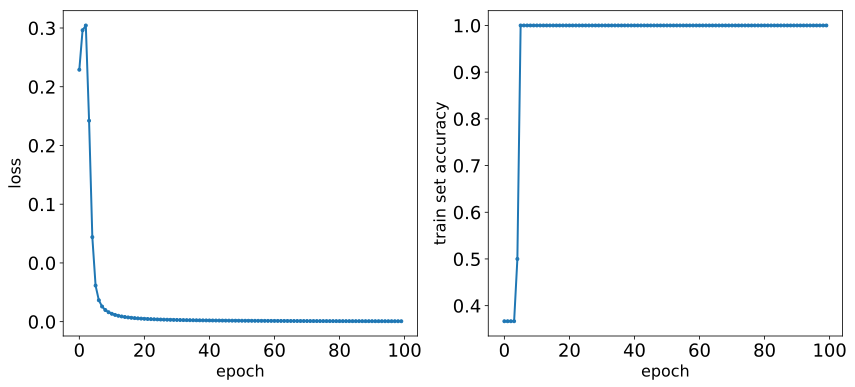

In [72]:
iris = datasets.load_iris()
df = np.c_[iris.data, iris.target]
df = df[:100, :]  # binary classification

np.random.shuffle(df)

X = df[:, :-1]
y = df[:, -1]

scaler = StandardScaler()
minmax = MinMaxScaler()
minmax_x = minmax.fit(X)    
minmax_y = minmax.fit(y.reshape(-1, 1)) 

X = minmax_x.transform(X)    
y = minmax_y.transform(y.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

the_net = network(alpha=0.25, n_features=X_train.shape[1])

y_values = np.unique(y_train)

epoch_loss = []    
train_acc = []
test_acc = []
average_correct = []
for epoch in range(0, 100):
    # train and update one sample at a time
    for sample in range(X_train.shape[0]):
        x = np.expand_dims(X_train[sample, :], axis=1)
        # 1. forward pass
        y_hat = the_net.forward_prop(x)     
        # 2. compute the loss
        loss = the_net.cross_entropy_loss(y_hat, y_train[sample])   
        # 3. backpropagate and update weights and biases
        the_net.backprop(y_hat, y_train[sample])                    



    # calculate average accuracy at the end of every epoch        
    for i in range(X_test.shape[0]):
        pred = the_net.forward_prop(np.expand_dims(X_train[i, :], axis=1))
        argmin = np.argmin(np.abs(pred - y_values))
        # correct prediction of the training set samples
        test_acc.append((y_values[argmin] == y_train[i])[0])

    epoch_loss.append(loss)
    average_correct.append(sum(test_acc) / len(test_acc))  

    if epoch%10 == 0:
        print("Epoch = {}, loss = {}".format(epoch + 1, loss[0]))            
        # average number of correct prediction per epoch              
        print("average training accuracy = {}\n".format(average_correct[-1]))

    test_acc = []

f, ax = plt.subplots(1, 2, figsize=(14,6))

ax[0].plot(epoch_loss, marker=".", lw=2)
ax[0].set_xlabel("epoch", fontsize=16)
ax[0].set_ylabel("loss", fontsize=16)
ax[0].set_xticklabels(ax[0].get_xticks().astype(int), fontsize=18)
ax[0].set_yticklabels(np.around(ax[0].get_yticks(), decimals=1), fontsize=18)

ax[1].plot(average_correct, marker=".", lw=2)
ax[1].set_xlabel("epoch", fontsize=16)
ax[1].set_ylabel("train set accuracy", fontsize=16)
ax[1].set_xticklabels(ax[1].get_xticks().astype(int), fontsize=18)
ax[1].set_yticklabels(np.around(ax[1].get_yticks(), decimals=1), fontsize=18)
plt.show()    